# Data Science April Minor Project

#### Problem statement
Create a classification model to predict the gender (male or female) based on different acoustic parameters.

## IMPORTING THE REQUIRED LIBRARIES

In [1]:
# General

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# ML Models

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Testing

from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Remove warnings

import warnings
warnings.filterwarnings('ignore')

## LOADING THE DATASET INTO DATAFRAME

In [2]:
data = pd.read_csv('voice.csv')

## CHECKING THE DATAFRAME

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## CHECKING THE SIZE OF DATAFRAME

In [4]:
data.shape

(3168, 21)

## CHECKING THE DATATYPES OF FEATURES

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

##### The data types are all correct.

## CHECKING FOR NULL VALUES

In [6]:
data.isnull()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3164,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3165,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3166,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

##### There are no null values in the data set.

## CHECKING FOR DUPLICATES

In [8]:
data.duplicated().sum()

2

##### The data has two duplicate values only so it will not make the model biased.

## PIE CHART REPRESENTATION

In [9]:
data.label.value_counts()

female    1584
male      1584
Name: label, dtype: int64

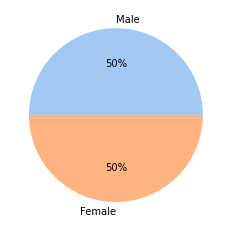

In [10]:
colors = sn.color_palette('pastel')
plt.pie(data.label.value_counts(),labels=['Male', 'Female'], 
        colors = colors, autopct = '%0.0f%%')
plt.show()

##### The labels are equaly distributed.

## DEFINING X AND Y

In [11]:
# Feature/ Independent Data
X = data.iloc[:,:-1]
# Target/ Dependent Data
y = data.label

## SPLITING THE DATASET

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=27)

## MODEL TRAINING

The following machine learning models will be trained and the performance will be compared to choose the best algorithm for this data.

- a. Decision Tree Classifier
- b. Random Forest Classifier
- c. KNN Classifier
- d. Logistic Regression
- e. SVM Classifier

## DECISION TREE

In [13]:
# Initializing

model_DT = DecisionTreeClassifier()

# Training

model_DT.fit(x_train,y_train)

# Predicting

y_pred_DT = model_DT.predict(x_test)

# Testing

DT_ACCURACY = accuracy_score(y_test,y_pred_DT)
print("The accuracy score is", DT_ACCURACY)
print("The classification report is\n", 
      classification_report(y_test,y_pred_DT))
print("The confusion matrix is\n", 
     confusion_matrix(y_test,y_pred_DT))

The accuracy score is 0.9574132492113565
The classification report is
               precision    recall  f1-score   support

      female       0.96      0.95      0.96       308
        male       0.96      0.96      0.96       326

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

The confusion matrix is
 [[294  14]
 [ 13 313]]


## RANDOM FOREST

In [14]:
# Initializing

model_RF = RandomForestClassifier()

# Training

model_RF.fit(x_train,y_train)

# Predicting

y_pred_RF = model_RF.predict(x_test)

# Testing
RF_ACCURACY = accuracy_score(y_test,y_pred_RF)
print("The accuracy score is", RF_ACCURACY)
print("The classification report is\n", 
      classification_report(y_test,y_pred_RF))
print("The confusion matrix is\n", 
     confusion_matrix(y_test,y_pred_RF))

The accuracy score is 0.9794952681388013
The classification report is
               precision    recall  f1-score   support

      female       0.97      0.99      0.98       308
        male       0.99      0.97      0.98       326

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

The confusion matrix is
 [[304   4]
 [  9 317]]


## KNN

In [15]:
# Initializing

model_KNN= KNeighborsClassifier(n_neighbors = 5, 
                                metric = 'minkowski', p = 2)

# Training

model_KNN.fit(x_train, y_train)

# Predicting

y_pred_KNN = model_KNN.predict(x_test)

# Testing

KNN_ACCURACY = accuracy_score(y_test,y_pred_KNN)
print("The accuracy score is", KNN_ACCURACY)
print("The classification report is\n", 
      classification_report(y_test,y_pred_KNN))
print("The confusion matrix is\n", 
     confusion_matrix(y_test,y_pred_KNN))

The accuracy score is 0.7239747634069401
The classification report is
               precision    recall  f1-score   support

      female       0.73      0.68      0.70       308
        male       0.72      0.77      0.74       326

    accuracy                           0.72       634
   macro avg       0.72      0.72      0.72       634
weighted avg       0.72      0.72      0.72       634

The confusion matrix is
 [[209  99]
 [ 76 250]]


## LOGISTIC REGRESSION

In [16]:
# Initializing

model_LR = LogisticRegression()

# Training

model_LR.fit(x_train,y_train)

# Predicting

y_pred_LR = model_LR.predict(x_test)

# Testing
LR_ACCURACY = accuracy_score(y_test,y_pred_LR)
print("The accuracy score is", LR_ACCURACY)
print("The classification report is\n", 
      classification_report(y_test,y_pred_LR))
print("The confusion matrix is\n", 
     confusion_matrix(y_test,y_pred_LR))

The accuracy score is 0.8359621451104101
The classification report is
               precision    recall  f1-score   support

      female       0.82      0.84      0.83       308
        male       0.85      0.83      0.84       326

    accuracy                           0.84       634
   macro avg       0.84      0.84      0.84       634
weighted avg       0.84      0.84      0.84       634

The confusion matrix is
 [[259  49]
 [ 55 271]]


## SVM

In [17]:
# Initializing

model_SVC = SVC()

# Training

model_SVC.fit(x_train,y_train)

# Predicting

y_pred_SVC = model_SVC.predict(x_test)

# Testing
SVC_ACCURACY = accuracy_score(y_test,y_pred_SVC)
print("The accuracy score is", SVC_ACCURACY)
print("The classification report is\n", 
      classification_report(y_test,y_pred_SVC))
print("The confusion matrix is\n", 
     confusion_matrix(y_test,y_pred_SVC))

The accuracy score is 0.7050473186119873
The classification report is
               precision    recall  f1-score   support

      female       0.76      0.58      0.66       308
        male       0.68      0.82      0.74       326

    accuracy                           0.71       634
   macro avg       0.72      0.70      0.70       634
weighted avg       0.71      0.71      0.70       634

The confusion matrix is
 [[179 129]
 [ 58 268]]


## COMPARING THE PERFORMANCE

In [18]:
Accuracy_score = [KNN_ACCURACY, SVC_ACCURACY, LR_ACCURACY,
                 DT_ACCURACY, RF_ACCURACY]
Models = ['KNN', 'SVC', 'Logistic Regression',
          'Decision Tree','Random Forest']

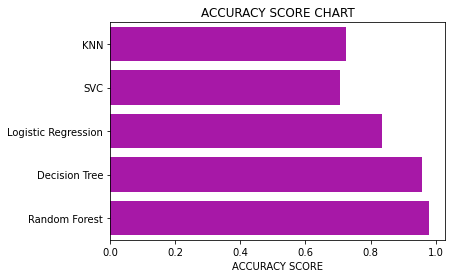

In [19]:
sn.barplot(Accuracy_score, Models, color="m")
plt.xlabel('ACCURACY SCORE')
plt.title('ACCURACY SCORE CHART')
plt.show()

##### It is vivid that Random forest has the highest accuracy score of 97% and f1 score of 98%. Therefore, Random forest gives the best result for this data set.